##Exercise Overview
In this exercise we will play with Spark [Datasets & Dataframes](https://spark.apache.org/docs/latest/sql-programming-guide.html#datasets-and-dataframes), some [Spark SQL](https://spark.apache.org/docs/latest/sql-programming-guide.html#sql), and build a couple of binary classifiaction models using [Spark ML](https://spark.apache.org/docs/latest/ml-guide.html) (with some [MLlib](https://spark.apache.org/mllib/) too). 
<br><br>
The set up and approach will not be too dissimilar to the standard type of approach you might do in [Sklearn](http://scikit-learn.org/stable/index.html). Spark has matured to the stage now where for 90% of what you need to do (when analysing tabular data) should be possible with Spark dataframes, SQL, and ML libraries. This is where this exercise is mainly trying to focus.  
<br>
Feel free to adapt this exercise to play with other datasets readily availabe in the Databricks enviornment (they are listed in a cell below). 
#####Getting Started
To get started you will need to create and attach a databricks spark cluster to this notebook. This notebook was developed on a cluster created with: 
- Databricks Runtime Version 4.0 (includes Apache Spark 2.3.0, Scala 2.11)
- Python Version 3

#####Links & References

Some useful links and references of sources used in creating this exercise:

**Note**: Right click and open as new tab!
<br>
1. [Latest Spark Docs](https://spark.apache.org/docs/latest/index.html)
1. [Databricks Homepage](https://databricks.com/)
1. [Databricks Community Edition FAQ](https://databricks.com/product/faq/community-edition)
1. [Databricks Self Paced Training](https://databricks.com/training-overview/training-self-paced)
1. [Databricks Notebook Guide](https://docs.databricks.com/user-guide/notebooks/index.html)
1. [Databricks Binary Classification Tutorial](https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html#binary-classification)

####Get Data

Here we will pull in some sample data that is already pre-loaded onto all databricks clusters.

Feel free to adapt this notebook later to play around with a different dataset if you like (all available are listed in a cell below).

In [0]:
# display datasets already in databricks
display(dbutils.fs.ls("/databricks-datasets"))

path name size modificationTime dbfs:/databricks-datasets/ databricks-datasets/ 0 0 dbfs:/databricks-datasets/COVID/ COVID/ 0 0 dbfs:/databricks-datasets/README.md README.md 976 1532468253000 dbfs:/databricks-datasets/Rdatasets/ Rdatasets/ 0 0 dbfs:/databricks-datasets/SPARK_README.md SPARK_README.md 3359 1455043490000 dbfs:/databricks-datasets/adult/ adult/ 0 0 dbfs:/databricks-datasets/airlines/ airlines/ 0 0 dbfs:/databricks-datasets/amazon/ amazon/ 0 0 dbfs:/databricks-datasets/asa/ asa/ 0 0 dbfs:/databricks-datasets/atlas_higgs/ atlas_higgs/ 0 0 dbfs:/databricks-datasets/bikeSharing/ bikeSharing/ 0 0 dbfs:/databricks-datasets/cctvVideos/ cctvVideos/ 0 0 dbfs:/databricks-datasets/credit-card-fraud/ credit-card-fraud/ 0 0 dbfs:/databricks-datasets/cs100/ cs100/ 0 0 dbfs:/databricks-datasets/cs110x/ cs110x/ 0 0 dbfs:/databricks-datasets/cs190/ cs190/ 0 0 dbfs:/databricks-datasets/data.gov/ data.gov/ 0 0 dbfs:/databricks-datasets/definitive-guide/ definitive-guide/ 0 0 dbfs:/databricks-datasets/delta-sharing/ delta-sharing/ 0 0 dbfs:/databricks-datasets/flights/ flights/ 0 0 dbfs:/databricks-datasets/flower_photos/ flower_photos/ 0 0 dbfs:/databricks-datasets/flowers/ flowers/ 0 0 dbfs:/databricks-datasets/genomics/ genomics/ 0 0 dbfs:/databricks-datasets/hail/ hail/ 0 0 dbfs:/databricks-datasets/identifying-campaign-effectiveness/ identifying-campaign-effectiveness/ 0 0 dbfs:/databricks-datasets/iot/ iot/ 0 0 dbfs:/databricks-datasets/iot-stream/ iot-stream/ 0 0 dbfs:/databricks-datasets/learning-spark/ learning-spark/ 0 0 dbfs:/databricks-datasets/learning-spark-v2/ learning-spark-v2/ 0 0 dbfs:/databricks-datasets/lending-club-loan-stats/ lending-club-loan-stats/ 0 0 dbfs:/databricks-datasets/med-images/ med-images/ 0 0 dbfs:/databricks-datasets/media/ media/ 0 0 dbfs:/databricks-datasets/mnist-digits/ mnist-digits/ 0 0 dbfs:/databricks-datasets/news20.binary/ news20.binary/ 0 0 dbfs:/databricks-datasets/nyctaxi/ nyctaxi/ 0 0 dbfs:/databricks-datasets/nyctaxi-with-zipcodes/ nyctaxi-with-zipcodes/ 0 0 dbfs:/databricks-datasets/online_retail/ online_retail/ 0 0 dbfs:/databricks-datasets/overlap-join/ overlap-join/ 0 0 dbfs:/databricks-datasets/power-plant/ power-plant/ 0 0 dbfs:/databricks-datasets/retail-org/ retail-org/ 0 0 dbfs:/databricks-datasets/rwe/ rwe/ 0 0 dbfs:/databricks-datasets/sai-summit-2019-sf/ sai-summit-2019-sf/ 0 0 dbfs:/databricks-datasets/sample_logs/ sample_logs/ 0 0 dbfs:/databricks-datasets/samples/ samples/ 0 0 dbfs:/databricks-datasets/sfo_customer_survey/ sfo_customer_survey/ 0 0 dbfs:/databricks-datasets/sms_spam_collection/ sms_spam_collection/ 0 0 dbfs:/databricks-datasets/songs/ songs/ 0 0 dbfs:/databricks-datasets/structured-streaming/ structured-streaming/ 0 0 dbfs:/databricks-datasets/timeseries/ timeseries/ 0 0 dbfs:/databricks-datasets/tpch/ tpch/ 0 0 dbfs:/databricks-datasets/warmup/ warmup/ 0 0 dbfs:/databricks-datasets/weather/ weather/ 0 0 dbfs:/databricks-datasets/wiki/ wiki/ 0 0 dbfs:/databricks-datasets/wikipedia-datasets/ wikipedia-datasets/ 0 0 dbfs:/databricks-datasets/wine-quality/ wine-quality/ 0 0

Lets take a look at the '**adult**' dataset on the filesystem. This is the typical US Census data you often see online in tutorials. [Here](https://archive.ics.uci.edu/ml/datasets/adult) is the same data in the UCI repository.

_As an aside: [here](https://github.com/GoogleCloudPlatform/cloudml-samples/tree/master/census) this same dataset is used as a quickstart example for Google CLoud ML & Tensorflow Estimator API (in case youd be interested in playing with tensorflow on the same dataset as here)._

In [0]:
%fs ls databricks-datasets/adult/adult.data

path name size modificationTime dbfs:/databricks-datasets/adult/adult.data adult.data 3974305 1444260537000

**Note**: Above  %fs is just some file system cell magic that is specific to databricks. More info [here](https://docs.databricks.com/user-guide/notebooks/index.html#mix-languages).

####Spark SQL
Below we will use Spark SQL to load in the data and then register it as a Dataframe aswell. So the end result will be a Spark SQL table called _adult_ and a Spark Dataframe called _df_adult_. 
<br><br>
This is an example of the flexibility in Spark in that you could do lots of you ETL and data wrangling using either Spark SQL or Dataframes and pyspark. Most of the time it's a case of using whatever you are most comfortable with.
<br><br>
When you get more advanced then you might looking the pro's and con's of each and when you might favour one or the other (or operating direclty on RDD's), [here](https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html) is a good article on the issues. For now, no need to overthink it!

In [0]:
%sql 
-- drop the table if it already exists
DROP TABLE IF EXISTS adult

In [0]:
%sql
-- create a new table in Spark SQL from the datasets already loaded in the underlying filesystem.
-- In the real world you might be pointing at a file on HDFS or a hive table etc. 
CREATE TABLE adult (
  age DOUBLE,
  workclass STRING,
  fnlwgt DOUBLE,
  education STRING,
  education_num DOUBLE,
  marital_status STRING,
  occupation STRING,
  relationship STRING,
  race STRING,
  sex STRING,
  capital_gain DOUBLE,
  capital_loss DOUBLE,
  hours_per_week DOUBLE,
  native_country STRING,
  income STRING)
USING com.databricks.spark.csv
OPTIONS (path "/databricks-datasets/adult/adult.data", header "true")

In [0]:
# look at the data
spark.sql("SELECT * FROM adult LIMIT 5").show() 
# this will look prettier in Databricks if you use display() instead
# display(spark.sql("SELECT * FROM adult LIMIT 5"))

+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
| age|        workclass|  fnlwgt| education|education_num|     marital_status|        occupation|  relationship|  race|    sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+----+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
|50.0| Self-emp-not-inc| 83311.0| Bachelors|         13.0| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|         0.0|         0.0|          13.0| United-States| <=50K|
|38.0|          Private|215646.0|   HS-grad|          9.0|           Divorced| Handlers-cleaners| Not-in-family| White|   Male|         0.0|         0.0|          40.0| United-States| <=50K|
|53.0|          Private|234721.0|      11th| 

In [0]:
display(spark.sql("SELECT * FROM adult LIMIT 5"))

age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K

If you are more comfortable with SQL then as you can see below, its very easy to just get going with writing standard SQL type code to analyse your data, do data wrangling and create new dataframes.

In [0]:
# Lets get some summary marital status rates by occupation
result = spark.sql(
  """
  SELECT 
    occupation,
    SUM(1) as n,
    ROUND(AVG(if(LTRIM(marital_status) LIKE 'Married-%',1,0)),2) as married_rate,
    ROUND(AVG(if(lower(marital_status) LIKE '%widow%',1,0)),2) as widow_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Divorced',1,0)),2) as divorce_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Separated',1,0)),2) as separated_rate,
    ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
  FROM 
    adult 
  GROUP BY 1
  ORDER BY n DESC
  """)
display(result)

occupation n married_rate widow_rate divorce_rate separated_rate bachelor_rate Prof-specialty 4140 0.53 0.02 0.13 0.02 0.3 Craft-repair 4099 0.64 0.01 0.11 0.03 0.21 Exec-managerial 4066 0.61 0.02 0.15 0.02 0.2 Adm-clerical 3769 0.28 0.04 0.22 0.04 0.42 Sales 3650 0.47 0.03 0.12 0.03 0.36 Other-service 3295 0.24 0.05 0.15 0.06 0.5 Machine-op-inspct 2002 0.51 0.03 0.14 0.04 0.29 ? 1843 0.36 0.08 0.1 0.04 0.42 Transport-moving 1597 0.63 0.02 0.11 0.02 0.21 Handlers-cleaners 1370 0.36 0.01 0.09 0.03 0.51 Farming-fishing 994 0.6 0.02 0.06 0.02 0.29 Tech-support 928 0.44 0.02 0.15 0.03 0.36 Protective-serv 649 0.6 0.01 0.12 0.02 0.24 Priv-house-serv 149 0.13 0.15 0.19 0.08 0.45 Armed-Forces 9 0.33 0.0 0.0 0.0 0.67

You can easily register dataframes as a table for Spark SQL too. So this way you can easily move between Dataframes and Spark SQL for whatever reason.

In [0]:
# register the df we just made as a table for spark sql
sqlContext.registerDataFrameAsTable(result, "result")
display(spark.sql("SELECT * FROM result"))

occupation n married_rate widow_rate divorce_rate separated_rate bachelor_rate Prof-specialty 4140 0.53 0.02 0.13 0.02 0.3 Craft-repair 4099 0.64 0.01 0.11 0.03 0.21 Exec-managerial 4066 0.61 0.02 0.15 0.02 0.2 Adm-clerical 3769 0.28 0.04 0.22 0.04 0.42 Sales 3650 0.47 0.03 0.12 0.03 0.36 Other-service 3295 0.24 0.05 0.15 0.06 0.5 Machine-op-inspct 2002 0.51 0.03 0.14 0.04 0.29 ? 1843 0.36 0.08 0.1 0.04 0.42 Transport-moving 1597 0.63 0.02 0.11 0.02 0.21 Handlers-cleaners 1370 0.36 0.01 0.09 0.03 0.51 Farming-fishing 994 0.6 0.02 0.06 0.02 0.29 Tech-support 928 0.44 0.02 0.15 0.03 0.36 Protective-serv 649 0.6 0.01 0.12 0.02 0.24 Priv-house-serv 149 0.13 0.15 0.19 0.08 0.45 Armed-Forces 9 0.33 0.0 0.0 0.0 0.67

####<span style="color:darkblue">Question 1</span>

1. Write some spark sql to get the top 'bachelor_rate' by 'education' group?

In [0]:
### Question 1.1 Answer ###

In [0]:
result = spark.sql(
"""
select 
education, 
ROUND(AVG(if(LTRIM(marital_status) = 'Never-married',1,0)),2) as bachelor_rate
from adult
group by education
order by bachelor_rate desc
limit 1
""")

display(result)

education bachelor_rate 12th 0.54

####Spark DataFrames
Below we will create our DataFrame from the SQL table and do some similar analysis as we did with Spark SQL but using the DataFrames API.

In [0]:
# register a df from the sql df
df_adult = spark.table("adult")
cols = df_adult.columns # this will be used much later in the notebook, ignore for now

In [0]:
# look at df schema
df_adult.printSchema()

root
 |-- age: double (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: double (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: double (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: double (nullable = true)
 |-- capital_loss: double (nullable = true)
 |-- hours_per_week: double (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)



In [0]:
# look at the df
display(df_adult)
# df_adult.show(5)

age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K 49.0 Private 160187.0 9th 5.0 Married-spouse-absent Other-service Not-in-family Black Female 0.0 0.0 16.0 Jamaica <=50K 52.0 Self-emp-not-inc 209642.0 HS-grad 9.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 45.0 United-States >50K 31.0 Private 45781.0 Masters 14.0 Never-married Prof-specialty Not-in-family White Female 14084.0 0.0 50.0 United-States >50K 42.0 Private 159449.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 5178.0 0.0 40.0 United-States >50K 37.0 Private 280464.0 Some-college 10.0 Married-civ-spouse Exec-managerial Husband Black Male 0.0 0.0 80.0 United-States >50K 30.0 State-gov 141297.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Husband Asian-Pac-Islander Male 0.0 0.0 40.0 India >50K 23.0 Private 122272.0 Bachelors 13.0 Never-married Adm-clerical Own-child White Female 0.0 0.0 30.0 United-States <=50K 32.0 Private 205019.0 Assoc-acdm 12.0 Never-married Sales Not-in-family Black Male 0.0 0.0 50.0 United-States <=50K 40.0 Private 121772.0 Assoc-voc 11.0 Married-civ-spouse Craft-repair Husband Asian-Pac-Islander Male 0.0 0.0 40.0 ? >50K 34.0 Private 245487.0 7th-8th 4.0 Married-civ-spouse Transport-moving Husband Amer-Indian-Eskimo Male 0.0 0.0 45.0 Mexico <=50K 25.0 Self-emp-not-inc 176756.0 HS-grad 9.0 Never-married Farming-fishing Own-child White Male 0.0 0.0 35.0 United-States <=50K 32.0 Private 186824.0 HS-grad 9.0 Never-married Machine-op-inspct Unmarried White Male 0.0 0.0 40.0 United-States <=50K 38.0 Private 28887.0 11th 7.0 Married-civ-spouse Sales Husband White Male 0.0 0.0 50.0 United-States <=50K 43.0 Self-emp-not-inc 292175.0 Masters 14.0 Divorced Exec-managerial Unmarried White Female 0.0 0.0 45.0 United-States >50K 40.0 Private 193524.0 Doctorate 16.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States >50K 54.0 Private 302146.0 HS-grad 9.0 Separated Other-service Unmarried Black Female 0.0 0.0 20.0 United-States <=50K 35.0 Federal-gov 76845.0 9th 5.0 Married-civ-spouse Farming-fishing Husband Black Male 0.0 0.0 40.0 United-States <=50K 43.0 Private 117037.0 11th 7.0 Married-civ-spouse Transport-moving Husband White Male 0.0 2042.0 40.0 United-States <=50K 59.0 Private 109015.0 HS-grad 9.0 Divorced Tech-support Unmarried White Female 0.0 0.0 40.0 United-States <=50K 56.0 Local-gov 216851.0 Bachelors 13.0 Married-civ-spouse Tech-support Husband White Male 0.0 0.0 40.0 United-States >50K 19.0 Private 168294.0 HS-grad 9.0 Never-married Craft-repair Own-child White Male 0.0 0.0 40.0 United-States <=50K 54.0 ? 180211.0 Some-college 10.0 Married-civ-spouse ? Husband Asian-Pac-Islander Male 0.0 0.0 60.0 South >50K 39.0 Private 367260.0 HS-grad 9.0 Divorced Exec-managerial Not-in-family White Male 0.0 0.0 80.0 United-States <=50K 49.0 Private 193366.0 HS-grad 9.0 Married-civ-spouse Craft-repair Husband White Male 0.0 0.0 40.0 United-States <=50K 23.0 Local-gov 190709.0 Assoc-acdm 12.0 Never-married Protective-serv Not-in-family White Male 0.0 0.0 52.0 United-States <=50K 20.0 Private 266015.0 Some-college 10.0 Never-married Sales Own-child Black Male 0.0 0.0 44.0 United-States <=50K 45.0 Private 386940.0 Bachelors 13.0 Divorced Exec-managerial Own-child White Male 0.0 1408.0 40.0 United

Below we will do a similar calculation to what we did above but using the DataFrames API

In [0]:
# import what we will need
from pyspark.sql.functions import when, col, mean, desc, round

# wrangle the data a bit
df_result = df_adult.select(
  df_adult['occupation'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Divorced' , 1 ).otherwise(0).alias('is_divorced')
)
# do grouping (and a round)
df_result = df_result.groupBy('occupation').agg(round(mean('is_divorced'),3).alias('divorced_rate'))
# do ordering
df_result = df_result.orderBy(desc('divorced_rate'))
# show results
df_result.show(5)

+----------------+-------------+
|      occupation|divorced_rate|
+----------------+-------------+
|    Adm-clerical|        0.217|
| Priv-house-serv|        0.188|
|   Other-service|        0.152|
|    Tech-support|        0.151|
| Exec-managerial|        0.149|
+----------------+-------------+
only showing top 5 rows



As you can see the dataframes api is a bit more verbose then just expressing what you want to do in standard SQL.<br><br>But some prefer it and might be more used to it, and there could be cases where expressing what you need to do might just be better using the DataFrame API if it is too complicated for a simple SQL expression for example of maybe involves recursion of some type.

####<span style="color:darkblue">Question 2</span>
1. Write some pyspark to get the top 'bachelor_rate' by 'education' group using DataFrame operations?

In [0]:
### Question 2.1 Answer ###

# wrangle the data a bit
df_result = # fill in here
df_result.show(1)

  File "<command-778574714774522>", line 4
    df_result = # fill in here
                ^
SyntaxError: invalid syntax


In [0]:
df_result = df_adult.select(
  df_adult['education'], 
  # create a 1/0 type col on the fly
  when( col('marital_status') == ' Never-married' , 1 ).otherwise(0).alias('is_bachelor')
)
# do grouping (and a round)
df_result = df_result.groupBy('education').agg(round(mean('is_bachelor'),2).alias('bachelor_rate'))
# do ordering
df_result = df_result.orderBy(desc('bachelor_rate'))
df_result.show(1)

+---------+-------------+
|education|bachelor_rate|
+---------+-------------+
|     12th|         0.54|
+---------+-------------+
only showing top 1 row



####Explore & Visualize Data
It's very easy to [collect()](https://spark.apache.org/docs/latest/rdd-programming-guide.html#printing-elements-of-an-rdd) your Spark DataFrame data into a Pandas df and then continue to analyse or plot as you might normally.
<br><br>
Obviously if you try to collect() a huge DataFrame then you will run into issues, so usually you would only collect aggregated or sampled data into a Pandas df.

In [0]:
import pandas as pd

# do some analysis
result = spark.sql(
  """
  SELECT 
    occupation,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

# collect results into a pandas df
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas)

            occupation  plus_50k
0      Exec-managerial  0.484014
1       Prof-specialty  0.449034
2      Protective-serv  0.325116
3         Tech-support  0.304957
4                Sales  0.269315
5         Craft-repair  0.226641
6     Transport-moving  0.200376
7         Adm-clerical  0.134518
8    Machine-op-inspct  0.124875
9      Farming-fishing  0.115694
10        Armed-Forces  0.111111
11                   ?  0.103635
12   Handlers-cleaners  0.062774
13       Other-service  0.041578
14     Priv-house-serv  0.006711


In [0]:
result = spark.sql(
  """
  SELECT 
    marital_status,
    AVG(IF(income = ' >50K',1,0)) as plus_50k
  FROM 
    adult 
  GROUP BY 1
  ORDER BY 2 DESC
  """)

# collect results into a pandas df
df_pandas = pd.DataFrame(
  result.collect(),
  columns=result.schema.names
)

# look at df
print(df_pandas)

           marital_status  plus_50k
0      Married-civ-spouse  0.446848
1       Married-AF-spouse  0.434783
2                Divorced  0.104209
3                 Widowed  0.085599
4   Married-spouse-absent  0.081340
5               Separated  0.064390
6           Never-married  0.045965


In [0]:
print(df_pandas.describe())

       plus_50k
count  7.000000
mean   0.180448
std    0.178812
min    0.045965
25%    0.072865
50%    0.085599
75%    0.269496
max    0.446848


In [0]:
print(df_pandas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marital_status  7 non-null      object 
 1   plus_50k        7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None


Here we will just do some very basic plotting to show how you might collect what you are interested in into a Pandas DF and then just plot any way you normally would.

For simplicity we are going to use the plotting functionality built into pandas (you could make this as pretty as you want).

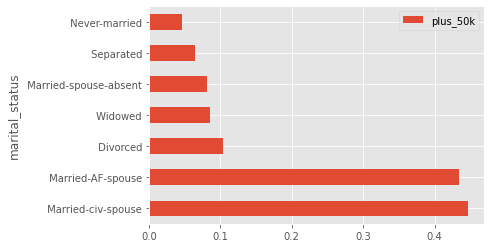

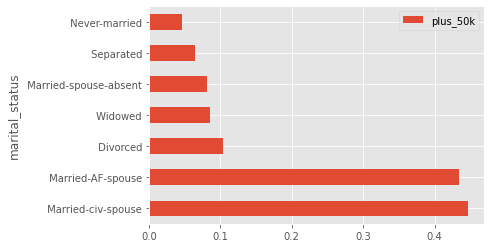

In [0]:
import matplotlib.pyplot as plt

# i like ggplot style
plt.style.use('ggplot')

# get simple plot on the pandas data
myplot = df_pandas.plot(kind='barh', x='marital_status', y='plus_50k')

# display the plot (note - display() is a databricks function - 
# more info on plotting in Databricks is here: https://docs.databricks.com/user-guide/visualizations/matplotlib-and-ggplot.html)
display(myplot.figure)

You can also easily get summary stats on a Spark DataFrame like below. [Here](https://databricks.com/blog/2015/06/02/statistical-and-mathematical-functions-with-dataframes-in-spark.html) is a nice blog post that has more examples.<br><br>So this is an example of why you might want to move from Spark SQL into DataFrames API as being able to just call describe() on the Spark DF is easier then trying to do the equivilant in Spark SQL.

In [0]:
# describe df
display(df_adult.select(df_adult['age'],df_adult['education_num']).describe())

summary age education_num count 32560 32560 mean 38.581633906633904 10.08058968058968 stddev 13.640641827464002 2.5727089681052058 min 17.0 1.0 max 90.0 16.0

### ML Pipeline - Logistic Regression vs Random Forest

Below we will create two [Spark ML Pipelines](https://spark.apache.org/docs/latest/ml-pipeline.html) - one that fits a logistic regression and one that fits a random forest. We will then compare the performance of each.

**Note**: A lot of the code below is adapted from [this example](https://docs.databricks.com/spark/latest/mllib/binary-classification-mllib-pipelines.html).

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
stages = [] # stages in our Pipeline

for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    # encoder = OneHotEncoderEstimator(inputCol=categoricalCol + "Index", outputCol=categoricalCol + "classVec")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [0]:
stages

Out[21]: [StringIndexer_b12af17613cb,
 OneHotEncoder_25e55499de5b,
 StringIndexer_d724f0945a67,
 OneHotEncoder_8747970a4831,
 StringIndexer_e4348af7a088,
 OneHotEncoder_ce58a51aa792,
 StringIndexer_c110ec9f8bca,
 OneHotEncoder_e9b7422dd87a,
 StringIndexer_4f6858b20b85,
 OneHotEncoder_81248bf06ed9,
 StringIndexer_5a63e2b39698,
 OneHotEncoder_6f79a714bbe1,
 StringIndexer_fcf878781c28,
 OneHotEncoder_902394b7dd1b,
 StringIndexer_819787e2607c,
 OneHotEncoder_750b32ffab36]

In [0]:
# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="income", outputCol="label")
stages += [label_stringIdx]

In [0]:
stages

Out[23]: [StringIndexer_b12af17613cb,
 OneHotEncoder_25e55499de5b,
 StringIndexer_d724f0945a67,
 OneHotEncoder_8747970a4831,
 StringIndexer_e4348af7a088,
 OneHotEncoder_ce58a51aa792,
 StringIndexer_c110ec9f8bca,
 OneHotEncoder_e9b7422dd87a,
 StringIndexer_4f6858b20b85,
 OneHotEncoder_81248bf06ed9,
 StringIndexer_5a63e2b39698,
 OneHotEncoder_6f79a714bbe1,
 StringIndexer_fcf878781c28,
 OneHotEncoder_902394b7dd1b,
 StringIndexer_819787e2607c,
 OneHotEncoder_750b32ffab36,
 StringIndexer_21fd68c43bd9]

In [0]:
# Transform all features into a vector using VectorAssembler
numericCols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [0]:
stages

Out[53]: [StringIndexer_b12af17613cb,
 OneHotEncoder_25e55499de5b,
 StringIndexer_d724f0945a67,
 OneHotEncoder_8747970a4831,
 StringIndexer_e4348af7a088,
 OneHotEncoder_ce58a51aa792,
 StringIndexer_c110ec9f8bca,
 OneHotEncoder_e9b7422dd87a,
 StringIndexer_4f6858b20b85,
 OneHotEncoder_81248bf06ed9,
 StringIndexer_5a63e2b39698,
 OneHotEncoder_6f79a714bbe1,
 StringIndexer_fcf878781c28,
 OneHotEncoder_902394b7dd1b,
 StringIndexer_819787e2607c,
 OneHotEncoder_750b32ffab36,
 StringIndexer_21fd68c43bd9,
 VectorAssembler_fdf21d4024ff]

In [0]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
# Run the feature transformations.
#  - fit() computes feature statistics as needed.
#  - transform() actually transforms the features.
pipelineModel = pipeline.fit(df_adult)
dataset = pipelineModel.transform(df_adult)
# Keep relevant columns
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
display(dataset)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(1, 10, 23, 31, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 83311.0, 13.0, 13.0)) 50.0 Self-emp-not-inc 83311.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 13.0 United-States <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 25, 38, 44, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 38.0, 215646.0, 9.0, 40.0)) 38.0 Private 215646.0 HS-grad 9.0 Divorced Handlers-cleaners Not-in-family White Male 0.0 0.0 40.0 United-States <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 13, 23, 38, 43, 49, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 53.0, 234721.0, 7.0, 40.0)) 53.0 Private 234721.0 11th 7.0 Married-civ-spouse Handlers-cleaners Husband Black Male 0.0 0.0 40.0 United-States <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 10, 23, 29, 47, 49, 62, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 28.0, 338409.0, 13.0, 40.0)) 28.0 Private 338409.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Wife Black Female 0.0 0.0 40.0 Cuba <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 11, 23, 31, 47, 48, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 284582.0, 14.0, 40.0)) 37.0 Private 284582.0 Masters 14.0 Married-civ-spouse Exec-managerial Wife White Female 0.0 0.0 40.0 United-States <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 18, 28, 34, 44, 49, 64, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 49.0, 160187.0, 5.0, 16.0)) 49.0 Private 160187.0 9th 5.0 Married-spouse-absent Other-service Not-in-family Black Female 0.0 0.0 16.0 Jamaica <=50K 1.0 Map(vectorType -> sparse, length -> 100, indices -> List(1, 8, 23, 31, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 52.0, 209642.0, 9.0, 45.0)) 52.0 Self-emp-not-inc 209642.0 HS-grad 9.0 Married-civ-spouse Exec-managerial Husband White Male 0.0 0.0 45.0 United-States >50K 1.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 11, 24, 29, 44, 48, 53, 94, 95, 96, 97, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 31.0, 45781.0, 14.0, 14084.0, 50.0)) 31.0 Private 45781.0 Masters 14.0 Never-married Prof-specialty Not-in-family White Female 14084.0 0.0 50.0 United-States >50K 1.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 10, 23, 31, 43, 48, 52, 53, 94, 95, 96, 97, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 42.0, 159449.0, 13.0, 5178.0, 40.0)) 42.0 Private 159449.0 Bachelors 13.0 Married-civ-spouse Exec-managerial Husband White Male 5178.0 0.0 40.0 United-States >50K 1.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 9, 23, 31, 43, 49, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 37.0, 280464.0, 10.0, 80.0)) 37.0 Private 280464.0 Some-college 10.0 Married-civ-spouse Exec-managerial Husband Black Male 0.0 0.0 80.0 United-States >50K 1.0 Map(vectorType -> sparse, length -> 100, indices -> List(4, 10, 23, 29, 43, 50, 52, 61, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 30.0, 141297.0, 13.0, 40.0)) 30.0 State-gov 141297.0 Bachelors 13.0 Married-civ-spouse Prof-specialty Husband Asian-Pac-Islander Male 0.0 0.0 40.0 India >50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 10, 24, 32, 45, 48, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 23.0, 122272.0, 13.0, 30.0)) 23.0 Private 122272.0 Bachelors 13.0 Never-married Adm-clerical Own-child White Female 0.0 0.0 30.0 United-States <=50K 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(

In [0]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)
print(trainingData.count())
print(testData.count())

22831
9729


In [0]:
from pyspark.sql.functions import avg

# get the rate of the positive outcome from the training data to use as a threshold in the model
training_data_positive_rate = trainingData.select(avg(trainingData['label'])).collect()[0][0] 

print("Positive rate in the training data is {}".format(training_data_positive_rate))

Positive rate in the training data is 0.2398931277648811


####Logistic Regression - Train

In [0]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# set threshold for the probability above which to predict a 1
lr.setThreshold(training_data_positive_rate)
# lr.setThreshold(0.5) # could use this if knew you had balanced data

# Train model with Training Data
lrModel = lr.fit(trainingData)

# get training summary used for eval metrics and other params
lrTrainingSummary = lrModel.summary

# Find the best model threshold if you would like to use that instead of the empirical positve rate
fMeasure = lrTrainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
lrBestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
  
print("Best threshold based on model performance on training data is {}".format(lrBestThreshold))

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
Best threshold based on model performance on training data is 0.3178139130754516


####GBM - Train

####<span style="color:darkblue">Question 3</span>
1. Train a GBTClassifier on the training data, call the trained model 'gbModel'

In [0]:
### Question 3.1 Answer ###
from pyspark.ml.classification import GBTClassifier

# Create initial GBTClassifier model
gb = GBTClassifier()

# Train model with Training Data
gbModel = gb.fit(trainingData)

####Logistic Regression - Predict

In [0]:
# make predictions on test data
lrPredictions = lrModel.transform(testData)

# display predictions
# display(lrPredictions.select("label", "prediction", "probability"))
display(lrPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 98, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(-1.656642231120978, 1.656642231120978)) Map(vectorType -> dense, length -> 2, values -> List(0.1602132525712759, 0.8397867474287242)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.8537572506170488, -0.8537572506170488)) Map(vectorType -> dense, length -> 2, values -> List(0.7013547171086596, 0.2986452828913404)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.11399291116704546, -0.11399291116704546)) Map(vectorType -> dense, length -> 2, values -> List(0.5284674080969827, 0.47153259190301733)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.7345221792768752, -0.7345221792768752)) Map(vectorType -> dense, length -> 2, values -> List(0.6757968481659136, 0.32420315183408643)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.48971161274379327, -0.48971161274379327)) Map(vectorType -> dense, length -> 2, values -> List(0.620038493322546, 0.379961506677454)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.4364154309059902, -0.4364154309059902)) Map(vectorType -> dense, length -> 2, values -> List(0.607404569017195, 0.392595430982805)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.4022227364719546, -0.4022227364719546)) Map(vectorType -> dense, length -> 2, values -> List(0.5992215790962835, 0.4007784209037165)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-specia

###GBM - Predict

####<span style="color:darkblue">Question 4</span>
1. Get predictions on the test data for your GBTClassifier. Call the predictions df 'gbPredictions'.

In [0]:
### Question 4.1 Answer ###

# make predictions on test data
gbPredictions = gbModel.transform(testData)

display(gbPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 98, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(-0.61471032577962, 0.61471032577962)) Map(vectorType -> dense, length -> 2, values -> List(0.226282841343071, 0.773717158656929)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.5406429016001368, -0.5406429016001368)) Map(vectorType -> dense, length -> 2, values -> List(0.7467372325265654, 0.25326276747343457)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3642304550755565, -0.3642304550755565)) Map(vectorType -> dense, length -> 2, values -> List(0.6744674390846465, 0.32553256091535354)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.4041260394293727, -0.4041260394293727)) Map(vectorType -> dense, length -> 2, values -> List(0.6917369078817294, 0.30826309211827063)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.2536879117080834, -0.2536879117080834)) Map(vectorType -> dense, length -> 2, values -> List(0.6241911050294706, 0.3758088949705294)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3279827467017421, -0.3279827467017421)) Map(vectorType -> dense, length -> 2, values -> List(0.6583535110361977, 0.34164648896380234)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3279827467017421, -0.3279827467017421)) Map(vectorType -> dense, length -> 2, values -> List(0.6583535110361977, 0.34164648896380234)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-special

####Logistic Regression - Evaluate

####<span style="color:darkblue">Question 5</span>
1. Complete the print_performance_metrics() function below to also include measures of F1, Precision, Recall, False Positive Rate and True Positive Rate.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics

def print_performance_metrics(predictions):
  # Evaluate model
  evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
  auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
  aupr = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
  print("auc = {}".format(auc))
  print("aupr = {}".format(aupr))

  # get rdd of predictions and labels for mllib eval metrics
  predictionAndLabels = predictions.select("prediction","label").rdd

  # Instantiate metrics objects
  binary_metrics = BinaryClassificationMetrics(predictionAndLabels)
  multi_metrics = MulticlassMetrics(predictionAndLabels)

  # Area under precision-recall curve
  print("Area under PR = {}".format(binary_metrics.areaUnderPR))
  # Area under ROC curve
  print("Area under ROC = {}".format(binary_metrics.areaUnderROC))
  # Accuracy
  print("Accuracy = {}".format(multi_metrics.accuracy))
  # Confusion Matrix
  print(multi_metrics.confusionMatrix())
  
  ### Question 5.1 Answer ###
  
  # F1
  print("F1 = {}".format(multi_metrics.fMeasure(0.0)))
  # Precision
  print("Precision = {}".format(multi_metrics.precision(0.0)))
  # Recall
  print("Recall = {}".format(multi_metrics.recall(0.0)))
  # FPR
  print("FPR = {}".format(multi_metrics.falsePositiveRate(0.0)))
  # TPR
  print("TPR = {}".format(multi_metrics.truePositiveRate(0.0)))
  
  
print_performance_metrics(lrPredictions)

# auc = 0.9032867661805299
# aupr = 0.7627830907418989
# Area under PR = 0.5366100314564946
# Area under ROC = 0.8159794860040686
# Accuracy = 0.80067880283863
# DenseMatrix([[ 5776.,  1572.],
#              [  366.,  2009.]])
# F1 = 0.8119489549119079
# Precision = 0.8477372148143116
# Recall = 0.8006788028386301
# FPR = 0.16871983083049324
# TPR = 0.8006788028386301

auc = 0.9022382581905842
aupr = 0.7639327846135503
Area under PR = 0.550904296478963
Area under ROC = 0.8214764233357801
Accuracy = 0.8119025593586185
DenseMatrix([[5913., 1452.],
             [ 378., 1986.]])
F1 = 0.8659929701230228
Precision = 0.9399141630901288
Recall = 0.8028513238289205
FPR = 0.1598984771573604
TPR = 0.8028513238289205


####GBM - Evaluate

In [0]:
print_performance_metrics(gbPredictions)

# auc = 0.9040236942383183
# aupr = 0.7735536738251583
# Area under PR = 0.6550101849659016
# Area under ROC = 0.7554568948227947
# Accuracy = 0.8524118070554355
# DenseMatrix([[ 6944.,   404.],
#              [ 1031.,  1344.]])
# F1 = 0.8442092351390111
# Precision = 0.8458443780269693
# Recall = 0.8524118070554356
# FPR = 0.3414980174098463
# TPR = 0.8524118070554356


auc = 0.909195754833477
aupr = 0.7844372890694545
Area under PR = 0.6442679528032073
Area under ROC = 0.7540978733962596
Accuracy = 0.8501387604070305
DenseMatrix([[6930.,  435.],
             [1023., 1341.]])
F1 = 0.9048178613396004
Precision = 0.8713692946058091
Recall = 0.9409368635437881
FPR = 0.43274111675126903
TPR = 0.9409368635437881


## Cross Validation

For each model you can run the below comand to see its params and a brief explanation of each.

In [0]:
print(lr.explainParams())

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

In [0]:
print(gb.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

####Logisitic Regression - Param Grid

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
lrParamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [2, 5])
             .build())

####GBM - Param Grid

####<span style="color:darkblue">Question 6</span>
1. Build out a param grid for the gb model, call it 'gbParamGrid'.

In [0]:
### Question 6.1 Answer ###

# Create ParamGrid for Cross Validation
gbParamGrid = (ParamGridBuilder()
             .addGrid(gb.stepSize, [.05, .1])
             .addGrid(gb.maxDepth, [5, 10])
             .addGrid(gb.maxIter, [5, 8])
             .build())

####Logistic Regression - Perform Cross Validation

In [0]:
# set up an evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

# Create CrossValidator
lrCv = CrossValidator(estimator=lr, estimatorParamMaps=lrParamGrid, evaluator=evaluator, numFolds=2)

# Run cross validations
lrCvModel = lrCv.fit(trainingData)
# this will likely take a fair amount of time because of the amount of models that we're creating and testing

In [0]:
# below approach to getting at the best params from the best cv model taken from:
# https://stackoverflow.com/a/46353730/1919374

# look at best params from the CV
print(lrCvModel.bestModel._java_obj.getRegParam())
print(lrCvModel.bestModel._java_obj.getElasticNetParam())
print(lrCvModel.bestModel._java_obj.getMaxIter())

0.01
0.0
5


####GBM - Perform Cross Validation

####<span style="color:darkblue">Question 7</span>
1. Perform cross validation of params on your 'gb' model.
1. Print out the best params you found.

In [0]:
### Question 7.1 Answer ###
# lrCv = CrossValidator(estimator=lr, estimatorParamMaps=lrParamGrid, evaluator=evaluator, numFolds=2)

# # Run cross validations
# lrCvModel = lrCv.fit(trainingData)
# Create CrossValidator
gbCv = CrossValidator(estimator = gb, estimatorParamMaps= gbParamGrid, evaluator=evaluator, numFolds=5)

# Run cross validations
gbCvModel = gbCv.fit(trainingData)

In [0]:
### Question 7.2 Answer ###
# dir(gbCvModel.bestModel)
# look at best params from the CV
print(gbCvModel.bestModel._java_obj.getStepSize())
print(gbCvModel.bestModel._java_obj.getMaxDepth())
print(gbCvModel.bestModel._java_obj.getMaxIter())

0.1
5
8


####Logistic Regression - CV Model Predict

In [0]:
# Use test set to measure the accuracy of our model on new data
lrCvPredictions = lrCvModel.transform(testData)

display(lrCvPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 98, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(-1.2303954581378482, 1.2303954581378482)) Map(vectorType -> dense, length -> 2, values -> List(0.22611221880218554, 0.7738877811978144)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.8015348464578596, -0.8015348464578596)) Map(vectorType -> dense, length -> 2, values -> List(0.6903027038994436, 0.3096972961005564)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.19070464539119847, -0.19070464539119847)) Map(vectorType -> dense, length -> 2, values -> List(0.5475321933188142, 0.4524678066811858)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.7054643125382372, -0.7054643125382372)) Map(vectorType -> dense, length -> 2, values -> List(0.6693981652016824, 0.3306018347983176)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.5013631165730059, -0.5013631165730059)) Map(vectorType -> dense, length -> 2, values -> List(0.6227796151432541, 0.3772203848567459)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.45982383708127106, -0.45982383708127106)) Map(vectorType -> dense, length -> 2, values -> List(0.6129723845664735, 0.3870276154335265)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.4314296641418709, -0.4314296641418709)) Map(vectorType -> dense, length -> 2, values -> List(0.6062150073033125, 0.39378499269668754)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-

####GBM - CV Model Predict

In [0]:
gbCvPredictions = gbCvModel.transform(testData)

display(gbCvPredictions)

label features age workclass fnlwgt education education_num marital_status occupation relationship race sex capital_gain capital_loss hours_per_week native_country income rawPrediction probability prediction 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 98, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 36.0, 370767.0, 9.0, 2377.0, 60.0)) 36.0 Private 370767.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 2377.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(-0.6130276611511413, 0.6130276611511413)) Map(vectorType -> dense, length -> 2, values -> List(0.2268725822271786, 0.7731274177728213)) 1.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 32.0, 131224.0, 9.0, 40.0)) 32.0 Private 131224.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.4348142616773412, -0.4348142616773412)) Map(vectorType -> dense, length -> 2, values -> List(0.704668395556631, 0.29533160444336903)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 33.0, 279173.0, 9.0, 60.0)) 33.0 Private 279173.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 60.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3659131197040352, -0.3659131197040352)) Map(vectorType -> dense, length -> 2, values -> List(0.6752059002435902, 0.3247940997564098)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 50700.0, 9.0, 40.0)) 39.0 Private 50700.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3017101234966917, -0.3017101234966917)) Map(vectorType -> dense, length -> 2, values -> List(0.6464384144428234, 0.35356158555717665)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 39.0, 181705.0, 9.0, 45.0)) 39.0 Private 181705.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 45.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.2707885560322828, -0.2707885560322828)) Map(vectorType -> dense, length -> 2, values -> List(0.632179217869911, 0.36782078213008895)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 50.0, 81548.0, 9.0, 40.0)) 50.0 Private 81548.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3017101234966917, -0.3017101234966917)) Map(vectorType -> dense, length -> 2, values -> List(0.6464384144428234, 0.35356158555717665)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 51.0, 94432.0, 9.0, 40.0)) 51.0 Private 94432.0 HS-grad 9.0 Married-civ-spouse Prof-specialty Husband White Male 0.0 0.0 40.0 United-States <=50K Map(vectorType -> dense, length -> 2, values -> List(0.3017101234966917, -0.3017101234966917)) Map(vectorType -> dense, length -> 2, values -> List(0.6464384144428234, 0.35356158555717665)) 0.0 0.0 Map(vectorType -> sparse, length -> 100, indices -> List(0, 8, 23, 29, 43, 48, 52, 53, 94, 95, 96, 99), values -> List(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 60.0, 198727.0, 9.0, 30.0)) 60.0 Private 198727.0 HS-grad 9.0 Married-civ-spouse Prof-spe

####Logistic Regression - CV Model Evaluate

In [0]:
print_performance_metrics(lrCvPredictions)

auc = 0.8970633845772201
aupr = 0.7460869514036187
Area under PR = 0.5330158297497791
Area under ROC = 0.8134734010841509
Accuracy = 0.799568300955905
DenseMatrix([[5792., 1573.],
             [ 377., 1987.]])
F1 = 0.8559184276636619
Precision = 0.9388879883287404
Recall = 0.7864222674813306
FPR = 0.15947546531302875
TPR = 0.7864222674813306


####GBM - CV Model Evaluate

In [0]:
print_performance_metrics(gbCvPredictions)

auc = 0.9055692251847414
aupr = 0.7796439450647217
Area under PR = 0.6384070192907483
Area under ROC = 0.7394856141511678
Accuracy = 0.8454106280193237
DenseMatrix([[6964.,  401.],
             [1103., 1261.]])
F1 = 0.9025401762571281
Precision = 0.863270112805256
Recall = 0.9455532926001358
FPR = 0.46658206429780036
TPR = 0.9455532926001358


####Logistic Regression - Model Explore

In [0]:
print('Model Intercept: ', lrCvModel.bestModel.intercept)

Model Intercept:  -5.9821391466705025


In [0]:
lrWeights = lrCvModel.bestModel.coefficients
lrWeights = [(float(w),) for w in lrWeights]  # convert numpy type to float, and to tuple
lrWeightsDF = sqlContext.createDataFrame(lrWeights, ["Feature Weight"])
display(lrWeightsDF)

Feature Weight 0.10728563291425162 -0.2961958701513941 -0.08240276890450877 -0.2781053241320957 -0.17741325409202524 0.3883038764029745 0.447508064612638 -1.8866287502815302 -0.19640038621592631 -0.0041308974494214746 0.3817931077161157 0.6284988311345274 0.09229260575747907 -0.550976358418968 -0.10623104529190863 -0.4890605013661405 -0.8678237436203432 0.9471353729749993 -0.6519605803614339 -0.3317698640034675 0.9584214854045416 -0.2573593596569983 -0.3433282171386037 0.6863392988415774 -0.6035635180249447 -0.24572383475327994 -0.2457249146256414 -0.01719191125818981 -0.4060146070152623 0.44010726177208725 -0.014673306215683685 0.6405969814782729 -0.06684124669001947 0.2139774602448999 -0.6523999067274737 -0.3864638791656345 -0.2777250611103521 -0.172481566272493 -0.5695455632302291 -0.7885204814319976 0.5208323170805699 0.403433660895344 -0.6974774212004072 0.5053398694433434 -0.1536681327777101 -0.62947040804748 -0.37060908655225616 1.213321473660665 0.12139678108007265 -0.11052394721073272 0.18959917600630574 -0.2056147250090643 0.46912587216278123 0.21774897067011148 -0.5689670307845954 -0.16761780865636497 0.3066464806374549 0.5156377462528039 0.5981711651635365 -0.13111117060004074 -0.4215656879297624 -0.46272012281937824 0.36064982941322826 0.18932527585751863 -0.3246423257408748 -0.4739278817236144 -0.4802453426575861 0.8413627153451679 -0.7691448588821359 -1.0109577315309095 0.31468989338844117 0.7877498592138686 -0.7078693061097616 -1.293521084648497 0.25517567269057917 0.18477689759510016 -0.35099401956277143 0.4959281085543585 -0.6052533131837212 -0.6340342309671774 -0.046670708144805485 -2.624536334458272 0.04025610542520033 -0.6461338580561099 0.1836682456172151 0.2726701934877572 -0.9658207075692551 -0.14150300845259572 0.20161147959179784 0.27886752962850864 -1.4496635819694923 -0.5535152520110531 0.6134917164991263 0.11840072805046425 0.020644038736542806 6.015316829290395E-7 0.12085956262993287 9.511010796712674E-5 5.486206539138475E-4 0.025059507568622463

### Feature Importance

####<span style="color:darkblue">Question 8</span>
1. Print out a table of feature_name and feature_coefficient from the Logistic Regression model.
<br><br>
Hint: Adapt the code from here: https://stackoverflow.com/questions/42935914/how-to-map-features-from-the-output-of-a-vectorassembler-back-to-the-column-name

In [0]:
### Question 8.1 Answer ###

# https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator

def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract += dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['feature_coefficient'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('feature_coefficient', ascending = False))

ExtractFeatureImp(lrWeights, dataset, 'features')



#                                          feature_name  feature_coefficient
# 20                       educationclassVec_ Doctorate         1.225138e+00
# 17                     educationclassVec_ Prof-school         1.209750e+00
# 11                         educationclassVec_ Masters         8.010314e-01
# 47                         relationshipclassVec_ Wife         7.589803e-01
# 31                occupationclassVec_ Exec-managerial         6.645506e-01
# 23         marital_statusclassVec_ Married-civ-spouse         6.435125e-01
# 43                      relationshipclassVec_ Husband         5.382321e-01
# 10                       educationclassVec_ Bachelors         4.405790e-01
# 5                     workclassclassVec_ Self-emp-inc         4.322838e-01
# 29                 occupationclassVec_ Prof-specialty         4.096262e-01
# 6                      workclassclassVec_ Federal-gov         4.075811e-01
# 86                   native_countryclassVec_ Cambodia         3.444299e-01
# 40                   occupationclassVec_ Tech-support         3.171813e-01
# 80                     native_countryclassVec_ France         2.480820e-01
# 41                occupationclassVec_ Protective-serv         2.035538e-01
# 52                                  sexclassVec_ Male         1.749580e-01
# 33                          occupationclassVec_ Sales         9.499070e-02
# 71                      native_countryclassVec_ Japan         8.105796e-02
# 93                   native_countryclassVec_ Scotland         3.767879e-02
# 96                                      education_num         2.483800e-02
# 57                    native_countryclassVec_ Germany         8.191203e-03
# 99                                     hours_per_week         4.374664e-03
# 94                                                age         4.156973e-03
# 76                       native_countryclassVec_ Iran         2.611785e-03
# 98                                       capital_loss         4.456794e-04
# 97                                       capital_gain         4.797946e-05
# 95                                             fnlwgt        -7.498115e-07
# 58                     native_countryclassVec_ Canada        -8.477189e-03
# 14                      educationclassVec_ Assoc-acdm        -4.723760e-02
# 67                      native_countryclassVec_ Italy        -5.696215e-02
# ..                                                ...                  ...
# 75                      native_countryclassVec_ Haiti        -6.112316e-01
# 51                   raceclassVec_ Amer-Indian-Eskimo        -6.145560e-01
# 91                   native_countryclassVec_ Honduras        -6.189448e-01
# 60                native_countryclassVec_ El-Salvador        -6.228860e-01
# 13                            educationclassVec_ 11th        -6.362003e-01
# 15                            educationclassVec_ 10th        -6.577699e-01
# 34                  occupationclassVec_ Other-service        -6.732046e-01
# 38              occupationclassVec_ Handlers-cleaners        -6.782282e-01
# 42                occupationclassVec_ Priv-house-serv        -7.377453e-01
# 39                occupationclassVec_ Farming-fishing        -7.430430e-01
# 45                    relationshipclassVec_ Own-child        -7.451284e-01
# 65                      native_countryclassVec_ South        -7.465534e-01
# 88                   native_countryclassVec_ Thailand        -7.724215e-01
# 24              marital_statusclassVec_ Never-married        -7.775786e-01
# 82                    native_countryclassVec_ Ecuador        -7.953933e-01
# 21                         educationclassVec_ 5th-6th        -7.968925e-01
# 18                             educationclassVec_ 9th        -8.060890e-01
# 22                         educationclassVec_ 1st-4th        -8.210516e-01
# 54                     native_countryclassVec_ Mexico        -8.322623e-01
# 81                     native_countryclassVec_ Greece        -8.397554e-01
# 79                       native_countryclassVec_ Peru        -8.441932e-01
# 68         native_countryclassVec_ Dominican-Republic        -8.646429e-01
# 16                         educationclassVec_ 7th-8th        -9.051719e-01
# 69                    native_countryclassVec_ Vietnam        -9.330670e-01
# 90  native_countryclassVec_ Outlying-US(Guam-USVI-...        -9.644833e-01
# 78                  native_countryclassVec_ Nicaragua        -9.708063e-01
# 66                      native_countryclassVec_ China        -9.719412e-01
# 92                    native_countryclassVec_ Hungary        -1.034384e+00
# 73                   native_countryclassVec_ Columbia        -1.140475e+00
# 7                      workclassclassVec_ Without-pay        -1.159749e+00

idx 
 name 
 feature_coefficient 
 
 
 
 
 53 
 47 
 relationshipclassVec_ Wife 
 (1.213321473660665,) 
 
 
 26 
 20 
 educationclassVec_ Doctorate 
 (0.9584214854045416,) 
 
 
 23 
 17 
 educationclassVec_ Prof-school 
 (0.9471353729749993,) 
 
 
 73 
 67 
 native_countryclassVec_ Italy 
 (0.8413627153451679,) 
 
 
 77 
 71 
 native_countryclassVec_ Japan 
 (0.7877498592138686,) 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 75 
 69 
 native_countryclassVec_ Vietnam 
 (-1.0109577315309095,) 
 
 
 79 
 73 
 native_countryclassVec_ Columbia 
 (-1.293521084648497,) 
 
 
 96 
 90 
 native_countryclassVec_ Outlying-US(Guam-USVI-... 
 (-1.4496635819694923,) 
 
 
 13 
 7 
 workclassclassVec_ Without-pay 
 (-1.8866287502815302,) 
 
 
 87 
 81 
 native_countryclassVec_ Greece 
 (-2.624536334458272,) 
 
 
 
 100 rows × 3 columns

In [0]:
dataset.schema['features'].metadata["ml_attr"]["attrs"]

Out[92]: {'numeric': [{'idx': 94, 'name': 'age'},
  {'idx': 95, 'name': 'fnlwgt'},
  {'idx': 96, 'name': 'education_num'},
  {'idx': 97, 'name': 'capital_gain'},
  {'idx': 98, 'name': 'capital_loss'},
  {'idx': 99, 'name': 'hours_per_week'}],
 'binary': [{'idx': 0, 'name': 'workclassclassVec_ Private'},
  {'idx': 1, 'name': 'workclassclassVec_ Self-emp-not-inc'},
  {'idx': 2, 'name': 'workclassclassVec_ Local-gov'},
  {'idx': 3, 'name': 'workclassclassVec_ ?'},
  {'idx': 4, 'name': 'workclassclassVec_ State-gov'},
  {'idx': 5, 'name': 'workclassclassVec_ Self-emp-inc'},
  {'idx': 6, 'name': 'workclassclassVec_ Federal-gov'},
  {'idx': 7, 'name': 'workclassclassVec_ Without-pay'},
  {'idx': 8, 'name': 'educationclassVec_ HS-grad'},
  {'idx': 9, 'name': 'educationclassVec_ Some-college'},
  {'idx': 10, 'name': 'educationclassVec_ Bachelors'},
  {'idx': 11, 'name': 'educationclassVec_ Masters'},
  {'idx': 12, 'name': 'educationclassVec_ Assoc-voc'},
  {'idx': 13, 'name': 'educationclassVe

In [0]:
# gbCvFeatureImportance = pd.DataFrame([(name, gbCvModel.bestModel.featureImportances[idx]) for idx, name in attrs],columns=['feature_name','feature_importance'])
# print(gbCvFeatureImportance.sort_values(by=['feature_importance'],ascending =False))

ExtractFeatureImp(gbCvModel.bestModel.featureImportances, dataset, 'features')

idx 
 name 
 feature_coefficient 
 
 
 
 
 29 
 23 
 marital_statusclassVec_ Married-civ-spouse 
 0.270584 
 
 
 0 
 94 
 age 
 0.188619 
 
 
 2 
 96 
 education_num 
 0.154580 
 
 
 3 
 97 
 capital_gain 
 0.087930 
 
 
 5 
 99 
 hours_per_week 
 0.068071 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 57 
 51 
 raceclassVec_ Amer-Indian-Eskimo 
 0.000000 
 
 
 22 
 16 
 educationclassVec_ 7th-8th 
 0.000000 
 
 
 61 
 55 
 native_countryclassVec_ ? 
 0.000000 
 
 
 62 
 56 
 native_countryclassVec_ Philippines 
 0.000000 
 
 
 99 
 93 
 native_countryclassVec_ Scotland 
 0.000000 
 
 
 
 100 rows × 3 columns

####<span style="color:darkblue">Question 9</span>
1. Build and train a RandomForestClassifier and print out a table of feature importances from it.

In [0]:
### Question 9.1 Answer ###

from  pyspark.ml.classification import RandomForestClassifier as RF

rf = RF()

rfModel = rf.fit(trainingData)

rfFeatureImportance = rfModel.featureImportances

#                                          feature_name  feature_importance
# 43                      relationshipclassVec_ Husband            0.162466
# 23         marital_statusclassVec_ Married-civ-spouse            0.130222
# 94                                                age            0.117549
# 24              marital_statusclassVec_ Never-married            0.091650
# 97                                       capital_gain            0.082070
# 96                                      education_num            0.069659
# 99                                     hours_per_week            0.067999
# 44                relationshipclassVec_ Not-in-family            0.034909
# 31                occupationclassVec_ Exec-managerial            0.022731
# 17                     educationclassVec_ Prof-school            0.022483
# 52                                  sexclassVec_ Male            0.021403
# 98                                       capital_loss            0.019937
# 10                       educationclassVec_ Bachelors            0.017821
# 29                 occupationclassVec_ Prof-specialty            0.015052
# 11                         educationclassVec_ Masters            0.013807
# 45                    relationshipclassVec_ Own-child            0.013467
# 46                    relationshipclassVec_ Unmarried            0.012889
# 47                         relationshipclassVec_ Wife            0.009872
# 48                                raceclassVec_ White            0.008749
# 25                   marital_statusclassVec_ Divorced            0.008365
# 34                  occupationclassVec_ Other-service            0.008066
# 20                       educationclassVec_ Doctorate            0.007454
# 8                          educationclassVec_ HS-grad            0.007267
# 5                     workclassclassVec_ Self-emp-inc            0.005913
# 16                         educationclassVec_ 7th-8th            0.002630
# 54                     native_countryclassVec_ Mexico            0.002104
# 32                   occupationclassVec_ Adm-clerical            0.002041
# 38              occupationclassVec_ Handlers-cleaners            0.001876
# 0                          workclassclassVec_ Private            0.001874
# 27                    marital_statusclassVec_ Widowed            0.001791
# ..                                                ...                 ...
# 28      marital_statusclassVec_ Married-spouse-absent            0.000006
# 56                native_countryclassVec_ Philippines            0.000003
# 70                  native_countryclassVec_ Guatemala            0.000002
# 92                    native_countryclassVec_ Hungary            0.000000
# 87                       native_countryclassVec_ Laos            0.000000
# 89                 native_countryclassVec_ Yugoslavia            0.000000
# 90  native_countryclassVec_ Outlying-US(Guam-USVI-...            0.000000
# 59                native_countryclassVec_ Puerto-Rico            0.000000
# 22                         educationclassVec_ 1st-4th            0.000000
# 93                   native_countryclassVec_ Scotland            0.000000
# 85            native_countryclassVec_ Trinadad&Tobago            0.000000
# 58                     native_countryclassVec_ Canada            0.000000
# 14                      educationclassVec_ Assoc-acdm            0.000000
# 7                      workclassclassVec_ Without-pay            0.000000
# 86                   native_countryclassVec_ Cambodia            0.000000
# 42                occupationclassVec_ Priv-house-serv            0.000000
# 60                native_countryclassVec_ El-Salvador            0.000000
# 68         native_countryclassVec_ Dominican-Republic            0.000000
# 82                    native_countryclassVec_ Ecuador            0.000000
# 62                       native_countryclassVec_ Cuba            0.000000
# 80                     native_countryclassVec_ France            0.000000
# 79                       native_countryclassVec_ Peru            0.000000
# 78                  native_countryclassVec_ Nicaragua            0.000000
# 77                   native_countryclassVec_ Portugal            0.000000
# 18                             educationclassVec_ 9th            0.000000
# 40                   occupationclassVec_ Tech-support            0.000000
# 73                   native_countryclassVec_ Columbia            0.000000
# 72                     native_countryclassVec_ Poland            0.000000
# 71                      native_countryclassVec_ Japan            0.000000
# 83                    native_countryclassVec_ Ireland            0.000000

In [0]:
ExtractFeatureImp(rfFeatureImportance, dataset, 'features')

idx 
 name 
 feature_coefficient 
 
 
 
 
 2 
 96 
 education_num 
 0.169529 
 
 
 29 
 23 
 marital_statusclassVec_ Married-civ-spouse 
 0.146835 
 
 
 30 
 24 
 marital_statusclassVec_ Never-married 
 0.107401 
 
 
 49 
 43 
 relationshipclassVec_ Husband 
 0.106423 
 
 
 3 
 97 
 capital_gain 
 0.091609 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 69 
 63 
 native_countryclassVec_ England 
 0.000000 
 
 
 70 
 64 
 native_countryclassVec_ Jamaica 
 0.000000 
 
 
 72 
 66 
 native_countryclassVec_ China 
 0.000000 
 
 
 74 
 68 
 native_countryclassVec_ Dominican-Republic 
 0.000000 
 
 
 99 
 93 
 native_countryclassVec_ Scotland 
 0.000000 
 
 
 
 100 rows × 3 columns